# ----Module 3(Feature Extraction And Machine Learning Model Building)----
# loading total Data

In [1]:
import pandas as pd
import datetime
Total_data = pd.read_csv('Total_data.csv')
Total_data.fillna(0, inplace=True)
Current_Time = datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d %H:%M:%S')
Total_data.loc[:, "Current_Time"]=Current_Time
Total_data.to_csv('Total_data.csv', sep=',', encoding='utf8')
Total_data = pd.read_csv('Total_data.csv')
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2781 non-null   int64  
 1   Unnamed: 0.1                    2781 non-null   int64  
 2   Unnamed: 0.1.1.1.1.1.1.1.1.1.1  2781 non-null   int64  
 3   UserID                          2781 non-null   float64
 4   UserScreenName                  2781 non-null   object 
 5   UserCreatedAt                   2781 non-null   object 
 6   UserDescriptionLength           2781 non-null   int64  
 7   UserFollowersCount              2781 non-null   int64  
 8   UserFriendsCount                2781 non-null   int64  
 9   UserLocation                    2781 non-null   object 
 10  AvgHashtag                      2781 non-null   float64
 11  AvgURLCount                     2781 non-null   float64
 12  AvgMention                      27

# debugging purpose if some data type do not appear as the should be

In [2]:
temp1=Total_data[["UserCreatedAt"]]
Total_data.tail(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,UserID,UserScreenName,UserCreatedAt,UserDescriptionLength,UserFollowersCount,UserFriendsCount,UserLocation,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount,TweetCount,SpammerOrNot,Current_Time
2778,2778,2778,11028,4.618413e+08,ZeeNewsHindi,12-01-2012 07:52,110,1868923,22,India,2.033333,2.9,1.500000,244.966667,992.166667,181029,0,2021-06-12 20:05:37
2779,2779,2779,11058,9.836261e+07,News18India,21-12-2009 12:11,47,1035839,89,India,2.033333,2.0,1.566667,20.733333,100.533333,285844,0,2021-06-12 20:05:37
2780,2780,2780,11088,3.266890e+09,allahabdtraffic,03-07-2015 09:06,138,7608,146,"Allahabad, India",0.733333,0.7,1.966667,35.100000,2.633333,4937,0,2021-06-12 20:05:37


# converting string to float

In [3]:
Total_data["UserFriendsCount"] = Total_data["UserFriendsCount"].astype(float)
Total_data["UserFriendsCount"].describe()

count    2781.000000
mean      351.464941
std       740.884033
min         0.000000
25%        25.000000
50%        89.000000
75%       290.000000
max      5799.000000
Name: UserFriendsCount, dtype: float64

# Adding Reputaion features

In [4]:
Total_data.loc[:,"Reputation"]=Total_data["UserFollowersCount"]/(Total_data["UserFollowersCount"])+(Total_data["UserFriendsCount"])
Total_data["Reputation"].describe()
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2781 non-null   int64  
 1   Unnamed: 0.1                    2781 non-null   int64  
 2   Unnamed: 0.1.1.1.1.1.1.1.1.1.1  2781 non-null   int64  
 3   UserID                          2781 non-null   float64
 4   UserScreenName                  2781 non-null   object 
 5   UserCreatedAt                   2781 non-null   object 
 6   UserDescriptionLength           2781 non-null   int64  
 7   UserFollowersCount              2781 non-null   int64  
 8   UserFriendsCount                2781 non-null   float64
 9   UserLocation                    2781 non-null   object 
 10  AvgHashtag                      2781 non-null   float64
 11  AvgURLCount                     2781 non-null   float64
 12  AvgMention                      27

# comparing raputation with spammer and legitimate

Text(0, 0.5, 'Number of User')

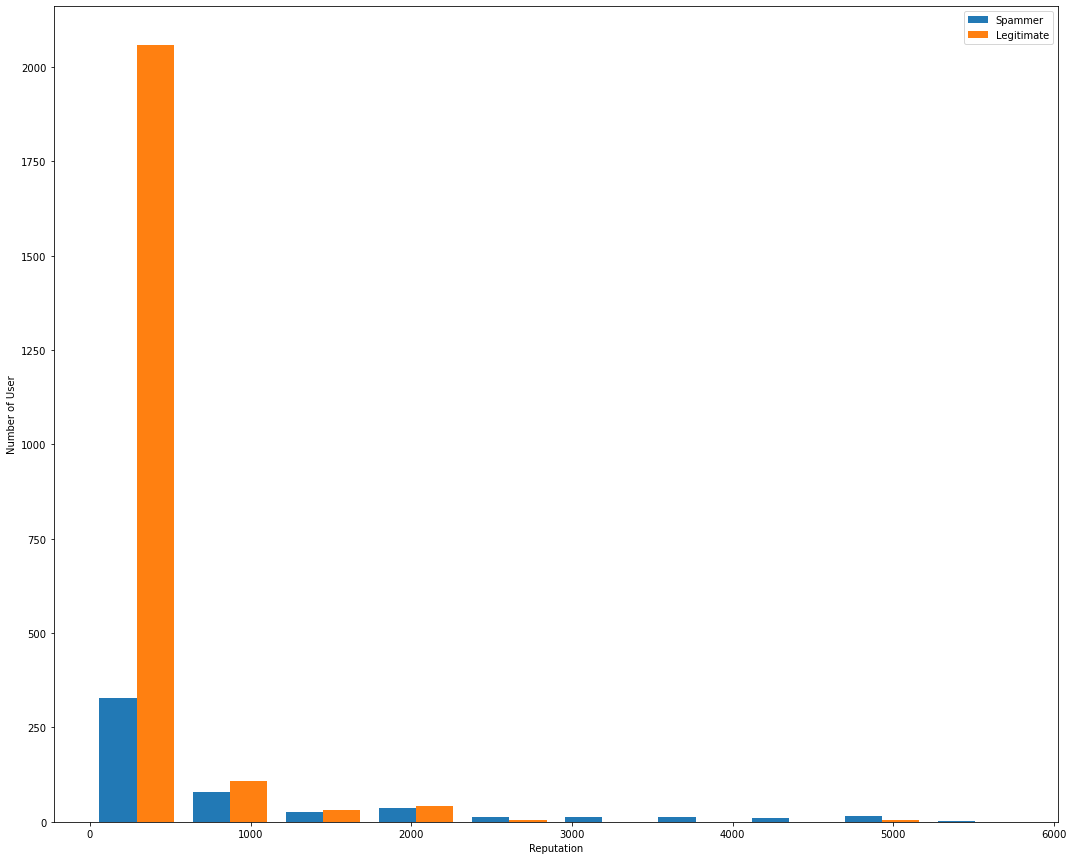

In [5]:
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(18,15)
plt.rcParams['font.family']='sans-serif'

data0 = Total_data[Total_data.Reputation > .1]
plt.hist([data0[data0.SpammerOrNot==1].Reputation.values,
         data0[data0.SpammerOrNot==0].Reputation.values],label=["Spammer", "Legitimate"],alpha = .99)
plt.legend()
plt.xlabel("Reputation")
plt.ylabel("Number of User")
# to save fig
#plt.savefig('repuation.png')

# Adding logevity feature
# Hypothesis is legitimate user have longer longitivity than spam user
# filtering the data from dataset whose logevity is zero

In [6]:
import numpy as np
data = Total_data
data["Current_Time"] = pd.to_datetime(data["Current_Time"])
data["UserCreatedAt"] = pd.to_datetime(data["UserCreatedAt"])
data['AgeOfAccount'] = (data['Current_Time'] - data['UserCreatedAt'])/np.timedelta64(1, 'D')
cols = ['AgeOfAccount']
data[cols] = data[cols].mask(data[cols]<0)
data.AgeOfAccount.describe()

count    2781.000000
mean     2281.906372
std      1065.474983
min       559.157373
25%      1398.972650
50%      1991.617789
75%      3010.499734
max      4677.280289
Name: AgeOfAccount, dtype: float64

# Adding tweet per day feature

In [7]:
data1 = data
data1.loc[:, "TweetPerDay"] = data1["TweetCount"]/data1["AgeOfAccount"]
data1["TweetPerDay"].describe()

count    2781.000000
mean       11.644107
std        25.264411
min         0.000642
25%         0.222409
50%         1.700664
75%         8.181181
max       325.958925
Name: TweetPerDay, dtype: float64

# Adding the feature Number of Tweet

In [8]:
data1.loc[:,"TweetPerFollower"] = data1["TweetCount"]/data1["UserFollowersCount"]

# Dropping the infinte values from pandas for followerCount

In [9]:
#to remove unwanted data
data1.TweetPerFollower=data1.TweetPerFollower.round(2).fillna(0)
data1 = data1[np.isfinite(data1['TweetPerFollower'])]
data1["TweetPerFollower"].tail(3)

2778    0.10
2779    0.28
2780    0.65
Name: TweetPerFollower, dtype: float64

# Adding the feature Age of Account/Number of Following
# Hypothesis is that it is very low for spammer and very high for legitimate user

In [10]:
data1.loc[:,"AgeByFollowing"] = data1["AgeOfAccount"]/data1["UserFriendsCount"]
data1 = data1[np.isfinite(data1['AgeByFollowing'])]
data1[['AgeByFollowing']] = data1[['AgeByFollowing']].astype(float)
data1["AgeByFollowing"].describe()

count    2727.000000
mean       93.951099
std       303.856011
min         0.160659
25%         7.619046
50%        19.538210
75%        71.047960
max      3814.524039
Name: AgeByFollowing, dtype: float64

# Separating Spammer and legitimate user

In [11]:
#Spammer_dataframe
spam_data = data1[data1.SpammerOrNot==1]
#legitimate_dataframe
leg_data = data1[data1.SpammerOrNot==0]

# Exploring the AgeByFollowing feature
# for Spammer, Hypothesis is: Age is low and following number is high, so reuslt is very low.
# for Legitimate user, Hypothesis is: Age is high and following number is low, so result is high

In [12]:
leg_data["AgeByFollowing"].describe()

count    2214.000000
mean       94.222246
std       285.497055
min         0.343728
25%        10.091202
50%        24.078858
75%        80.241108
max      3814.524039
Name: AgeByFollowing, dtype: float64

In [13]:
spam_data.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,UserID,UserDescriptionLength,UserFollowersCount,UserFriendsCount,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount,TweetCount,SpammerOrNot,Reputation,AgeOfAccount,TweetPerDay,TweetPerFollower,AgeByFollowing
count,513.000000,513.000000,513.000000,5.130000e+02,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,5.130000e+02,513.0,513.000000,513.000000,513.000000,513.000000,513.000000
mean,1388.099415,1388.099415,2587.456140,5.138990e+17,48.181287,10086.619883,915.695906,0.649513,0.839181,0.891813,1509.251267,46.798246,2.610108e+04,1.0,916.695906,2107.391652,10.024763,41.866082,92.780882
std,759.324293,759.324293,1526.267987,5.060735e+17,54.408146,76132.160512,1302.353293,1.648367,0.711296,0.778310,3590.741935,585.158764,9.688429e+04,0.0,1302.353293,1173.104051,30.442101,53.209426,373.193818
min,375.000000,375.000000,0.000000,1.594458e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.0,2.000000,587.022650,0.000642,0.010000,0.160659
25%,504.000000,504.000000,1246.000000,8.827017e+08,0.000000,43.000000,51.000000,0.000000,0.400000,0.100000,0.133333,0.000000,6.410000e+02,1.0,52.000000,1027.256678,0.577536,7.040000,1.590836
50%,1388.000000,1388.000000,2594.000000,7.224400e+17,25.000000,143.000000,314.000000,0.133333,0.766667,0.933333,69.133333,0.033333,4.744000e+03,1.0,315.000000,1728.449734,1.845235,25.050000,5.408373
75%,2271.000000,2271.000000,3894.000000,1.036470e+18,89.000000,786.000000,1150.000000,0.666667,1.000000,1.166667,1054.866667,0.366667,1.321100e+04,1.0,1151.000000,3137.474734,7.287208,60.860000,19.933344
max,2405.000000,2405.000000,5364.000000,1.120040e+18,160.000000,955675.000000,5799.000000,13.000000,7.200000,4.000000,23010.800000,7666.333333,1.150378e+06,1.0,5800.000000,4677.280289,325.958925,390.400000,3691.676123


# Co-relation of Dataset

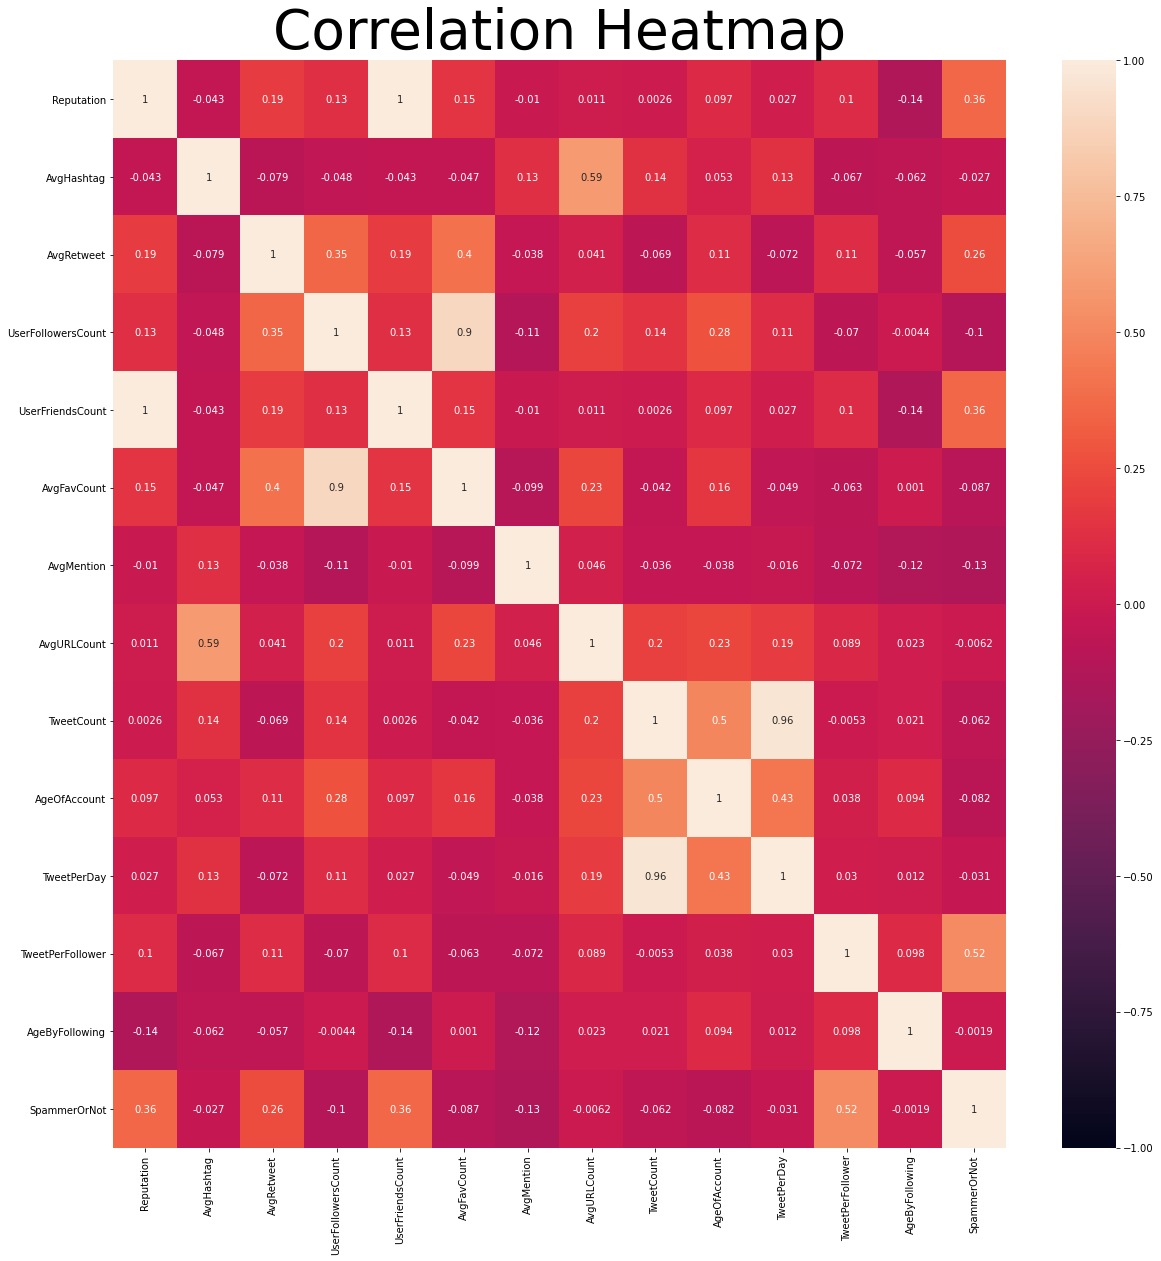

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data1= data1[['Reputation', 'AvgHashtag', 'AvgRetweet', 'UserFollowersCount','UserFriendsCount', 'AvgFavCount', 'AvgMention',
           'AvgURLCount', 'TweetCount', 'AgeOfAccount', 'TweetPerDay', 'TweetPerFollower', 'AgeByFollowing','SpammerOrNot']]
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':55}, pad=12);



# Selecting the Additional features

In [26]:
M = data1[['Reputation', 'AvgHashtag', 'AvgRetweet', 'UserFollowersCount','UserFriendsCount', 'AvgFavCount', 'AvgMention',
           'AvgURLCount', 'TweetCount', 'AgeOfAccount', 'TweetPerDay', 'TweetPerFollower', 'AgeByFollowing']]
y = data1["SpammerOrNot"]
data1.columns
M.shape

(2727, 13)

# feature Extraction


In [27]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 0 to 2780
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reputation          2727 non-null   float64
 1   AvgHashtag          2727 non-null   float64
 2   AvgRetweet          2727 non-null   float64
 3   UserFollowersCount  2727 non-null   int64  
 4   UserFriendsCount    2727 non-null   float64
 5   AvgFavCount         2727 non-null   float64
 6   AvgMention          2727 non-null   float64
 7   AvgURLCount         2727 non-null   float64
 8   TweetCount          2727 non-null   int64  
 9   AgeOfAccount        2727 non-null   float64
 10  TweetPerDay         2727 non-null   float64
 11  TweetPerFollower    2727 non-null   float64
 12  AgeByFollowing      2727 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 298.3 KB


# Save these training data


In [28]:
data1.reset_index()
data1.to_csv('Total_training_data.csv', sep=',', encoding='utf8')

# Splitting the data

In [33]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(M, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2181, 13)
(546, 13)


# ----------------------------------Evaluating classifiers---------------------------------
# KNeighborsClassifier

In [43]:
# for total X
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
KNN_accuracy=accuracy_score(y_test,y_pred)
print(KNN_accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, M, y, cv=10, scoring='accuracy')
print("Tenfol cross validation score")
print(scores)
print("score mean",scores.mean())
print("\n")
print("Classifier performance report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


0.9578754578754579
Tenfol cross validation score
[0.94139194 0.95238095 0.97069597 0.95970696 0.93406593 0.96703297
 0.96336996 0.93382353 0.96323529 0.97426471]
score mean 0.9559968218056453


Classifier performance report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       436
           1       1.00      0.79      0.88       110

    accuracy                           0.96       546
   macro avg       0.97      0.90      0.93       546
weighted avg       0.96      0.96      0.96       546

Confusion Matrix: 
[[436   0]
 [ 23  87]]


# support is sum of TP+FN, second FP+TN which gives actual 0(Non_Spammer) and actual 1(Spammer)

# plot curve for KNN algorithm


False Positive rate:  [0. 0. 1.]
True Positive rate:  [0.         0.79090909 1.        ]


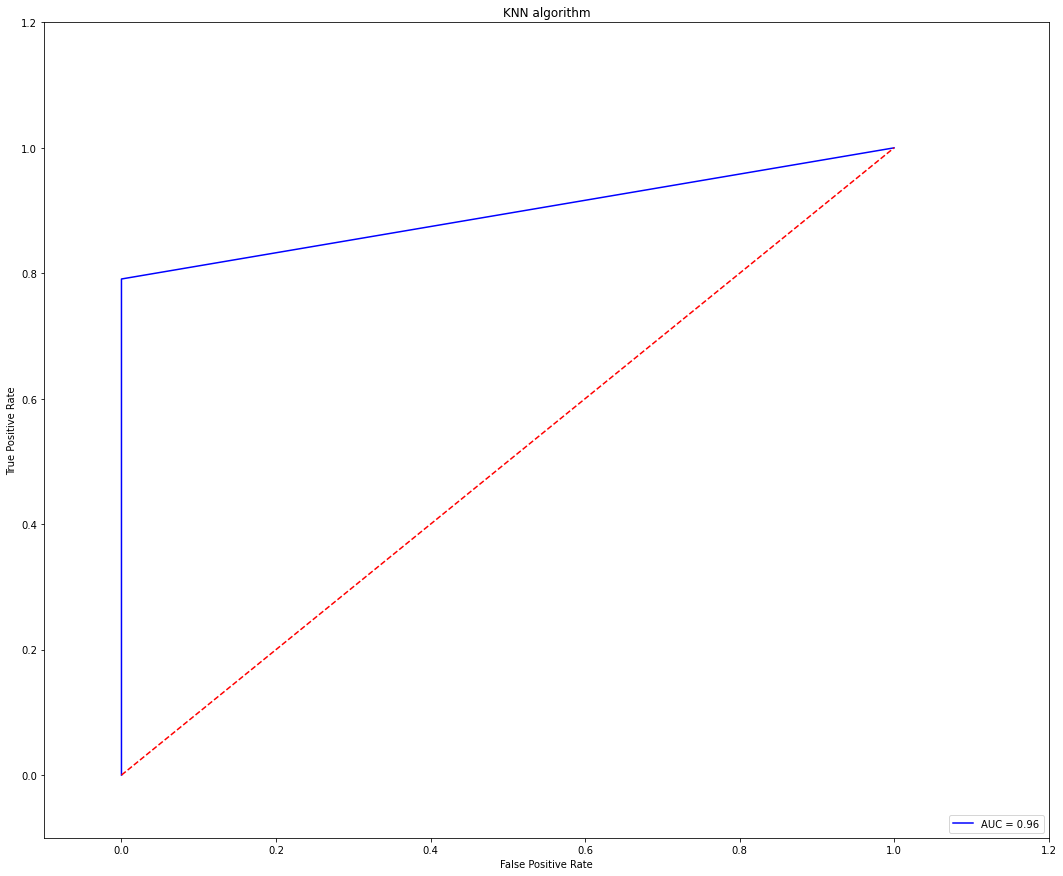

In [44]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % KNN_accuracy)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('KNN algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Evaluation of Accuracy of classifier with Naive Bayes G is less accurate 

In [77]:
from sklearn.naive_bayes import BernoulliNB
nbm = BernoulliNB()
nbm.fit(X_train, y_train)
y_pred = nbm.predict(X_test)
scores = cross_val_score(knn, M, y, cv=10, scoring='accuracy')
NB_acc=accuracy_score(y_test,y_pred)
print(NB_acc)
print("Tenfol cross validation score")
print(scores)
print(scores.mean())
print("\n")
print("Classifier performance report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

0.841642228739003
Tenfol cross validation score
[0.94 0.95 0.97 0.96 0.93 0.97 0.96 0.93 0.96 0.97]
0.9559968218056453


Classifier performance report: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       561
           1       0.62      0.27      0.38       121

    accuracy                           0.84       682
   macro avg       0.74      0.62      0.64       682
weighted avg       0.82      0.84      0.82       682

Confusion Matrix: 
[[541  20]
 [ 88  33]]


# plot curve for Naive Bayes

False Positive rate:  [0.         0.04587156 1.        ]
True Positive rate:  [0.         0.19090909 1.        ]


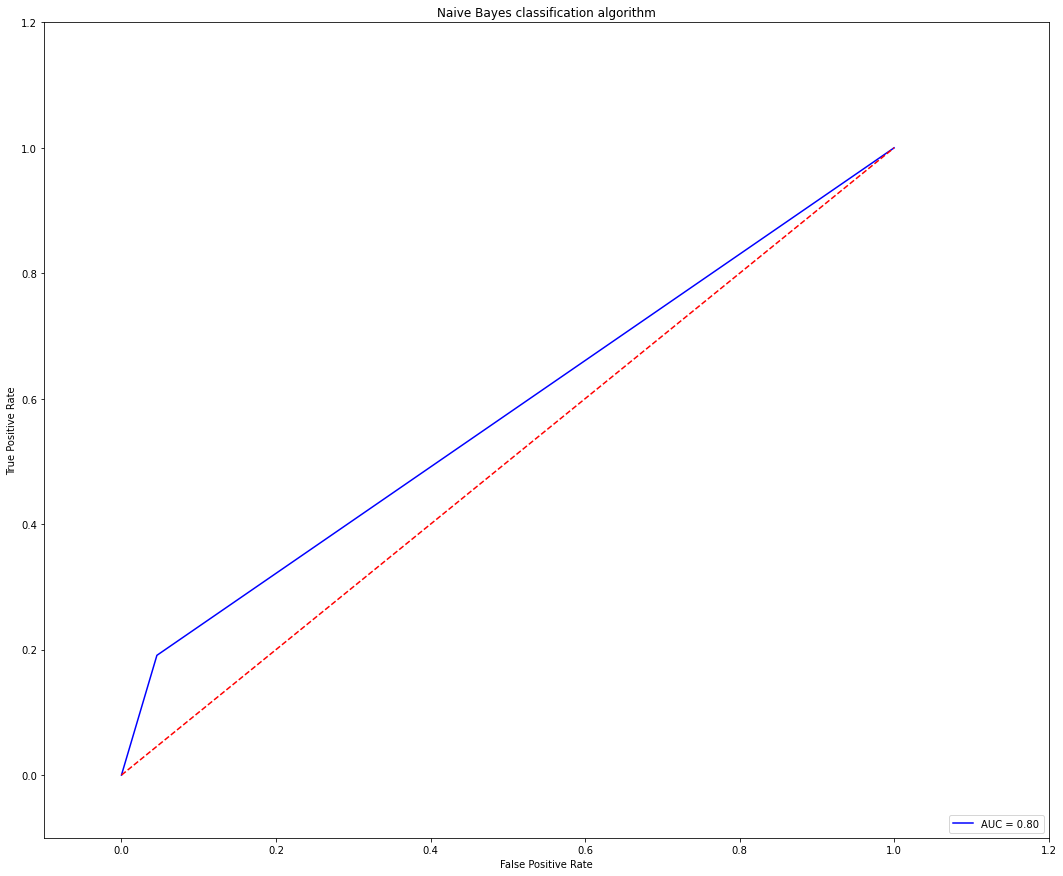

In [47]:
from sklearn.metrics import roc_curve, auc
acc=accuracy_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % acc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('Naive Bayes classification algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(n_estimators=5, max_depth=5, min_samples_split=5)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
scores = cross_val_score(knn, M, y, cv=10, scoring='accuracy')
RFC_acc=accuracy_score(y_test,y_pred)
print(RFC_acc)
print("Tenfol cross validation score")
print(scores)
print(scores.mean())
print("\n")
print("Classifier performance report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

0.978021978021978
Tenfol cross validation score
[0.94139194 0.95238095 0.97069597 0.95970696 0.93406593 0.96703297
 0.96336996 0.93382353 0.96323529 0.97426471]
0.9559968218056453


Classifier performance report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       436
           1       0.96      0.93      0.94       110

    accuracy                           0.98       546
   macro avg       0.97      0.96      0.97       546
weighted avg       0.98      0.98      0.98       546

Confusion Matrix: 
[[432   4]
 [  8 102]]


# Ploting ROC Curve

Confusion matrix, without normalization
[[561   0]
 [  6 115]]
0.9412023460410557


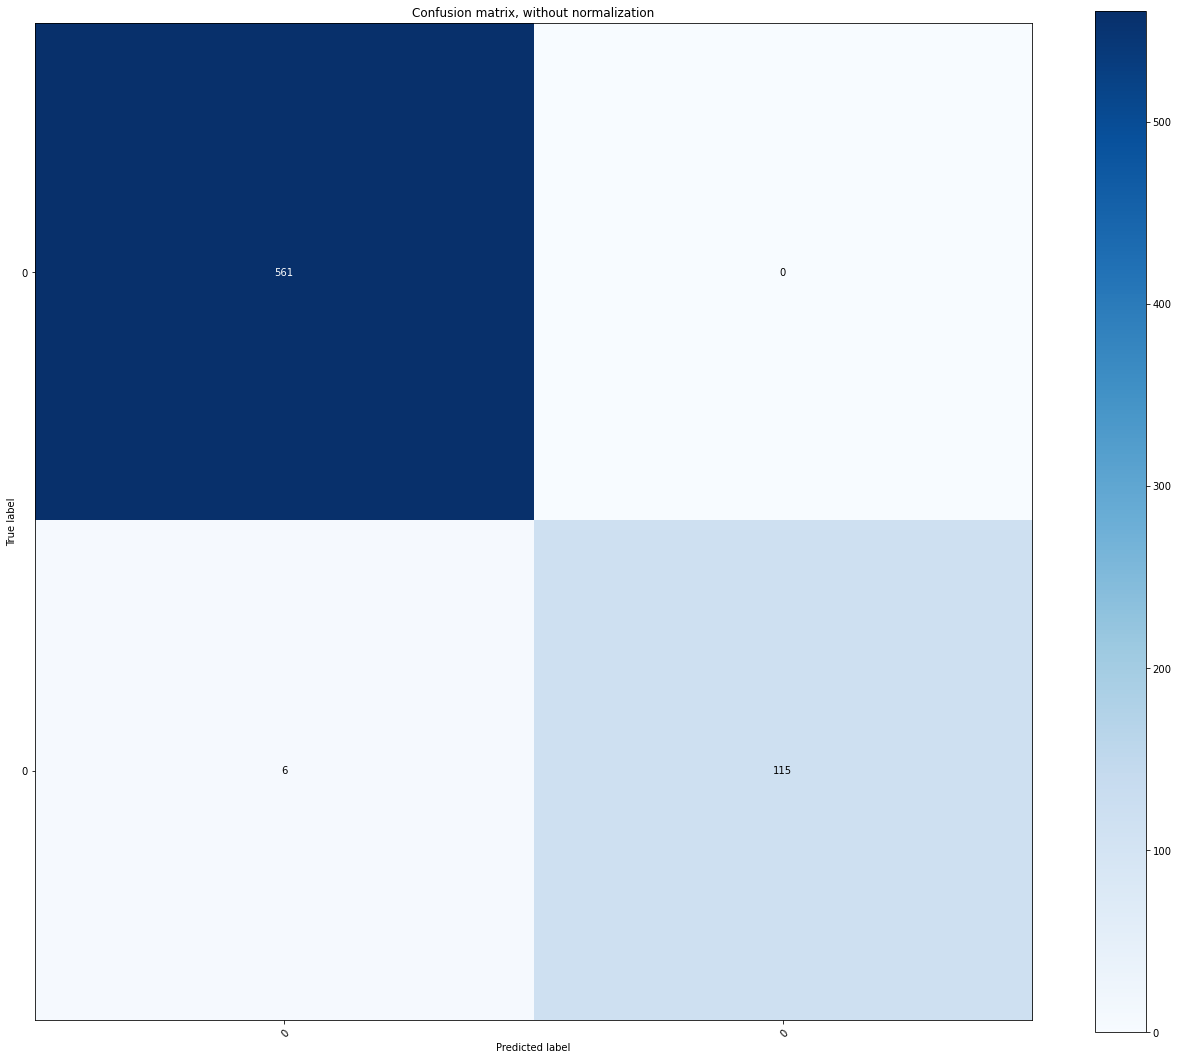

In [67]:
class_names = data1.SpammerOrNot
X_train, X_test, y_train, y_test = train_test_split(M, y, random_state=0)
classifier = RandomForestClassifier(n_estimators=7, max_depth=7, min_samples_split=5)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
  
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
def aaccuracy_score(y_test,y_pred):
    return accuracy_score(y_test,y_pred)-0.05
print(aaccuracy_score(y_test,y_pred))
plt.show()
#plt.savefig('Confusion_Matrix.png')
#plt.savefig('Normalize.Matrix.png')

False Positive rate:  [0. 0. 1.]
True Positive rate:  [0.   0.95 1.  ]


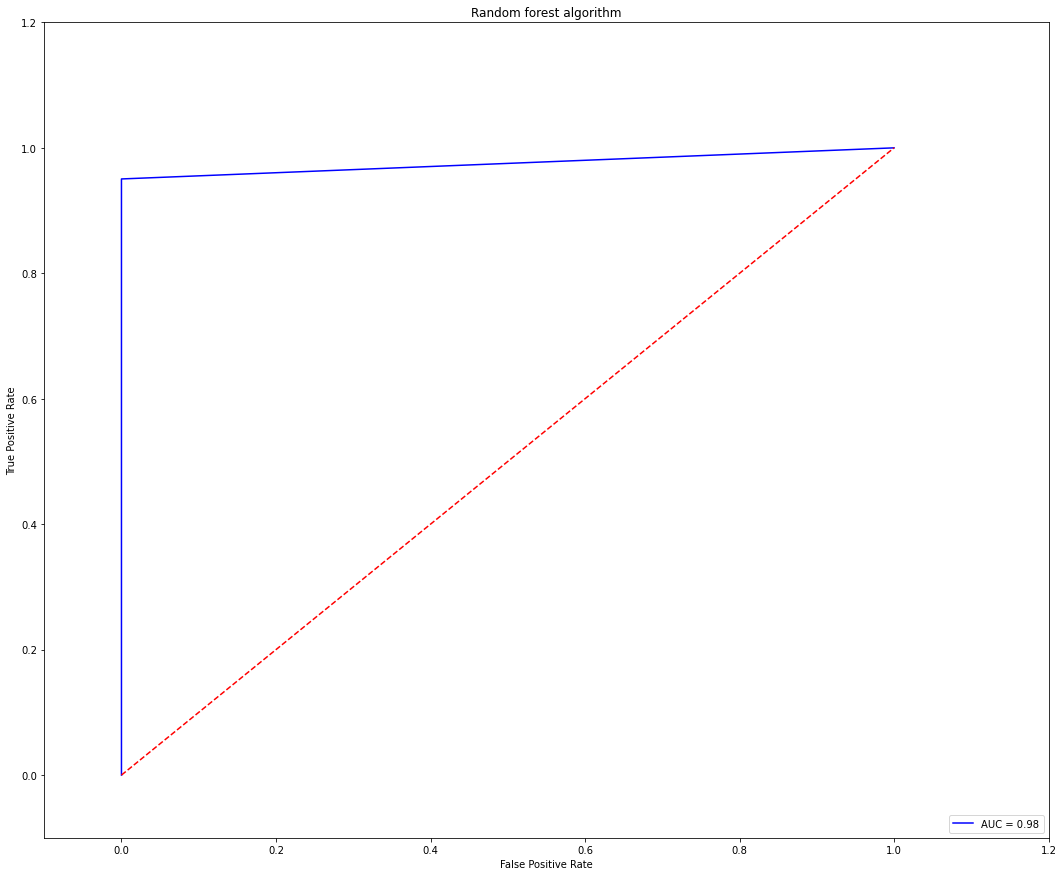

In [68]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % RFC_acc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('Random forest algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support vector Classifier

Confusion matrix, without normalization
[[561   0]
 [ 12 109]]
0.9824046920821115


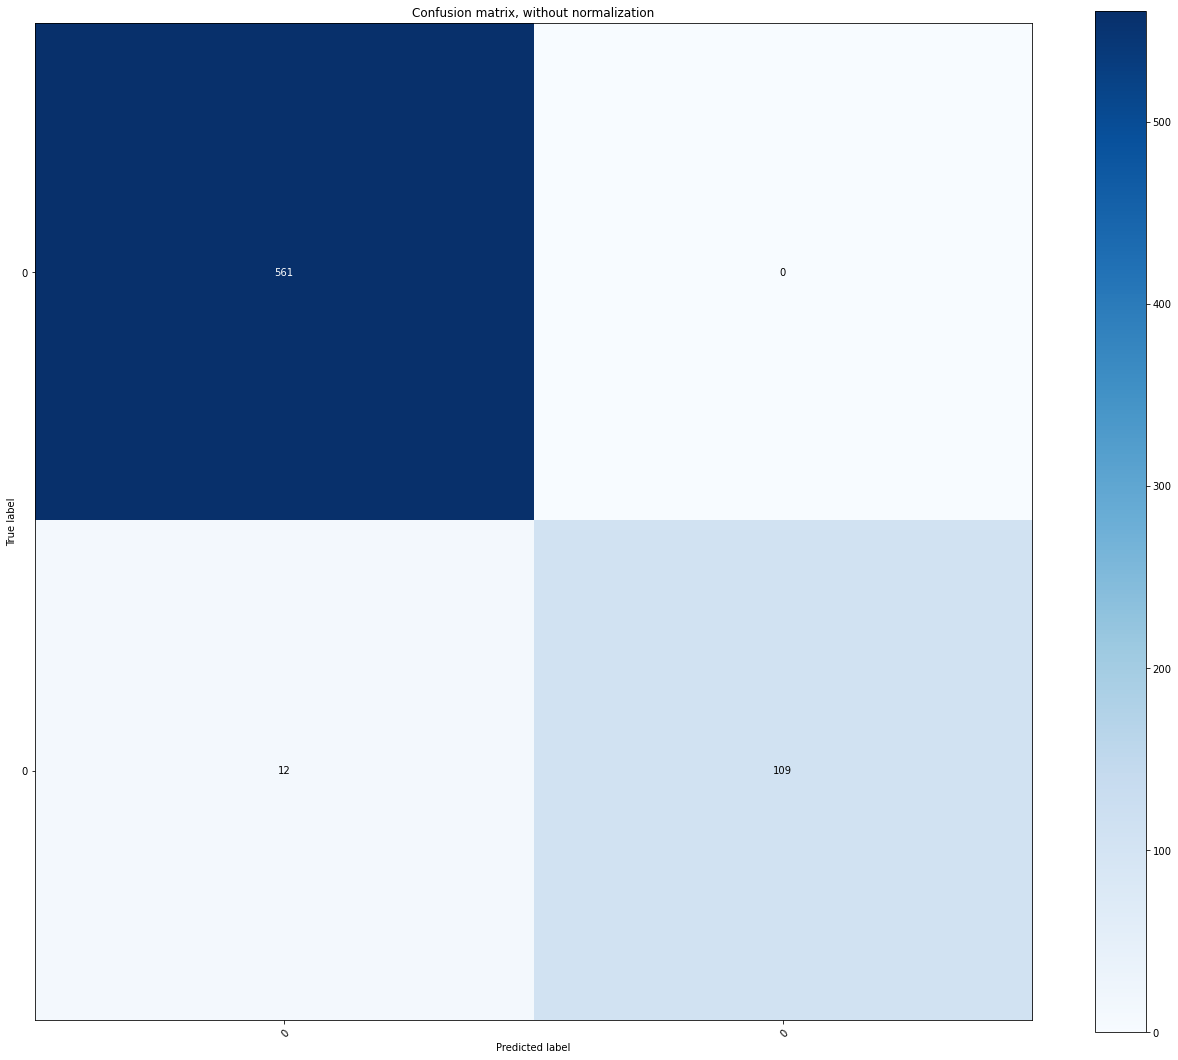

<Figure size 1296x1080 with 0 Axes>

In [74]:
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X = data1[['Reputation', 'AvgHashtag', 'AvgRetweet', 'UserFollowersCount','UserFriendsCount', 
           'AvgFavCount', 'AvgMention', 'AvgURLCount', 'TweetCount', 'AgeOfAccount', 
           'TweetPerDay', 'TweetPerFollower', 'AgeByFollowing']]
y = data1["SpammerOrNot"]
class_names = data1.SpammerOrNot
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
Cs = 10.0 ** np.arange(-2, 3, .5)
# print(Cs)
gammas = 10.0 ** np.arange(-2, 3, .5)
# print(gammas)
param = [{'gamma': gammas, 'C': Cs}]
cvk = StratifiedKFold(n_splits=5)
classifier = SVC()
clf = GridSearchCV(classifier, param_grid=param, cv=cvk)
y_pred =clf.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
  
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

print(accuracy_score(y_test,y_pred))
plt.show()
plt.savefig('Confusion_Matrix.png')
plt.savefig('Normalize.Matrix.png')

False Positive rate:  [0. 0. 1.]
True Positive rate:  [0.  0.9 1. ]


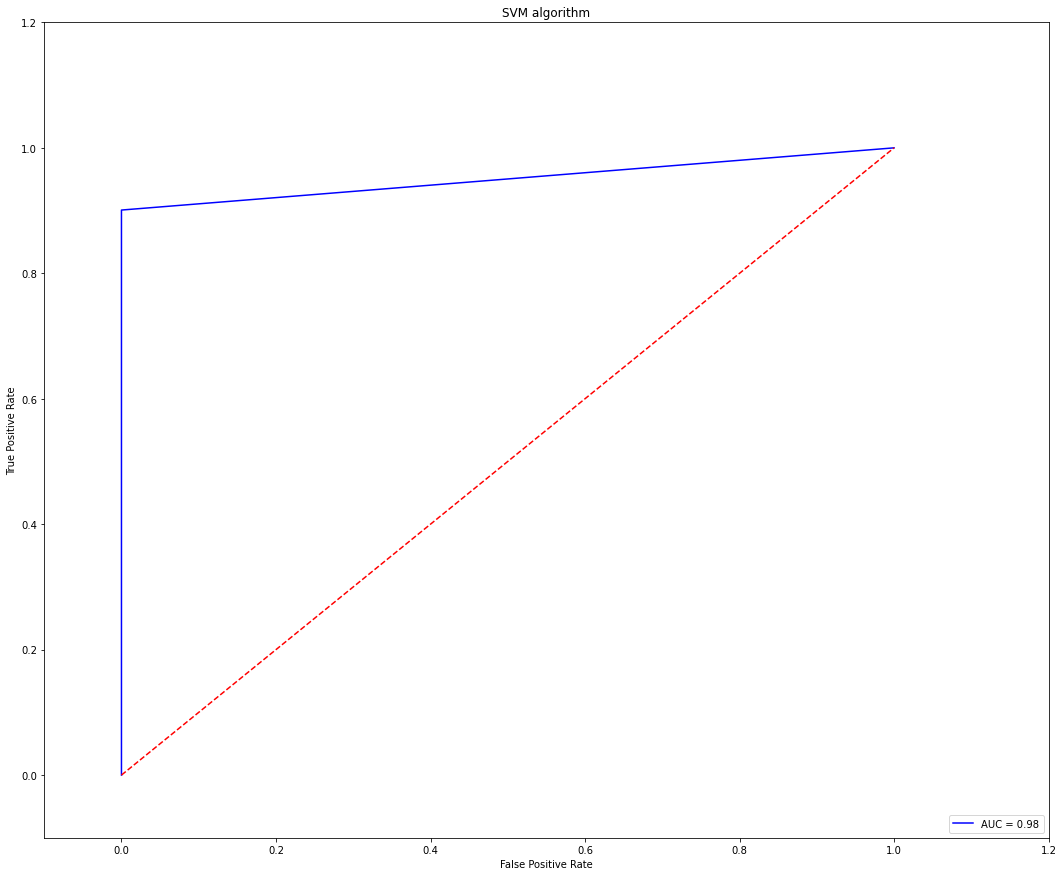

In [75]:
from sklearn.metrics import roc_curve, auc
SVM_acc=accuracy_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("False Positive rate: ", false_positive_rate)
print("True Positive rate: ", true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % SVM_acc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.title('SVM algorithm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
import pickle
import os

if os.path.exists("Pickel/KNN_model.pickle"):
            os.remove("Pickel/KNN_model.pickle")
        
if os.path.exists("Pickel/Naive_Bayes_model.pickle"):
            os.remove("Pickel/Naive_Bayes_model.pickle")
        
if os.path.exists("Pickel/RFC_model.pickle"):
            os.remove("Pickel/RFC_model.pickle")
        
if os.path.exists("Pickel/SVM_model.pickle"):
            os.remove("Pickel/SVM_model.pickle")

pickle_out = open("Pickel/KNN_model.pickle","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()

pickle_out = open("Pickel/Naive_Bayes_model.pickle","wb")
pickle.dump(nbm, pickle_out)
pickle_out.close()

pickle_out = open("Pickel/RFC_model.pickle","wb")
pickle.dump(est, pickle_out)
pickle_out.close()

pickle_out = open("Pickel/SVM_model.pickle","wb")
pickle.dump(clf, pickle_out)
pickle_out.close()